In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)

njobs = -1
randomState = 0


%matplotlib inline

In [11]:
acc_data = pd.read_csv('data/Accidents2016.csv', index_col=0, dtype={'LSOA_of_Accident_Location': str})
acc_data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2016010000005,519310.000,188730.000,-0.279,51.585,1,3,2,1,01/11/2016,3,...,0,0,5,1,1,0,0,1,1,E01000543
2016010000006,551920.000,174560.000,0.185,51.450,1,3,1,1,01/11/2016,3,...,0,0,4,1,1,0,0,1,1,E01000375
2016010000008,505930.000,183850.000,-0.474,51.544,1,3,1,1,01/11/2016,3,...,0,0,4,1,1,0,0,1,1,E01033725
2016010000016,527770.000,168930.000,-0.164,51.405,1,3,1,1,01/11/2016,3,...,0,0,1,1,1,0,0,1,1,E01003379
2016010000018,510740.000,177230.000,-0.407,51.483,1,3,2,1,01/11/2016,3,...,0,0,1,1,1,0,0,1,1,E01002583


In [12]:
# #rows and #columns
acc_data.shape

(136621, 31)

In [13]:
#information about datatypes
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136621 entries, 2016010000005 to 2016984133416
Data columns (total 31 columns):
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR                         136614 non-null float64
Longitude                                      136614 non-null float64
Latitude                                       136614 non-null float64
Police_Force                                   136621 non-null int64
Accident_Severity                              136621 non-null int64
Number_of_Vehicles                             136621 non-null int64
Number_of_Casualties                           136621 non-null int64
Date                                           136621 non-null object
Day_of_Week                                    136621 non-null int64
Time                                           136619 non-null object
Local_Authority_(District)                     136621 non-null int64
Local_Authority_(Highway)            

In [14]:
#some statistics from the data
acc_data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,136614.000,136614.000,136614.000,136614.000,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000,...,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000,136621.000
mean,448699.363,288335.427,-1.305,52.482,29.860,2.816,1.848,1.328,4.116,342.787,...,321.591,0.011,0.824,1.984,1.553,1.292,0.085,0.055,1.353,1.254
std,95230.253,157058.832,1.399,1.414,25.252,0.418,0.710,0.789,1.917,258.404,...,1202.759,0.155,1.927,1.677,1.691,0.588,0.655,0.557,0.478,0.465
min,76702.000,11075.000,-7.390,49.920,1.000,1.000,1.000,1.000,1.000,1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1.000,1.000
25%,386355.750,176424.750,-2.204,51.474,6.000,3.000,1.000,1.000,2.000,102.000,...,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000
50%,454126.000,237485.500,-1.201,52.025,30.000,3.000,2.000,1.000,4.000,323.000,...,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000
75%,527660.000,389743.750,-0.160,53.402,45.000,3.000,2.000,1.000,6.000,516.000,...,0.000,0.000,0.000,4.000,1.000,2.000,0.000,0.000,2.000,1.000
max,655256.000,1178623.000,1.758,60.490,98.000,3.000,16.000,58.000,7.000,941.000,...,9999.000,2.000,8.000,7.000,9.000,5.000,7.000,7.000,3.000,3.000


In [15]:
#replace -1 with nans
#acc_data = acc_data.replace(-1, np.nan, inplace=True)
acc_data = acc_data.replace(-1, np.nan)

In [16]:
acc_data['Accident_Severity'].value_counts()

3    113201
2     21725
1      1695
Name: Accident_Severity, dtype: int64

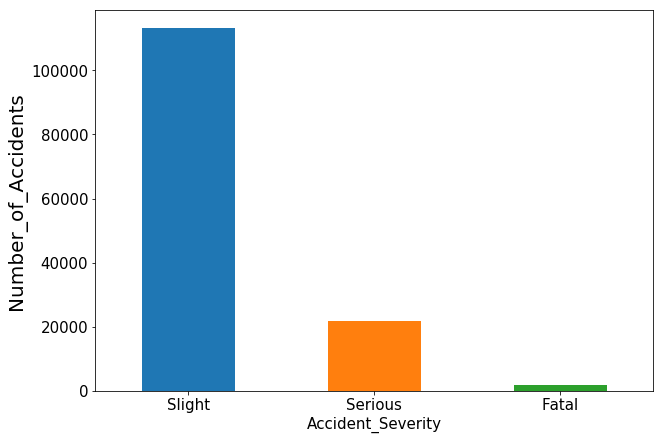

In [17]:
#a priori: groups to detect in our model
plt.figure(figsize = (10,7))
acc_data['Accident_Severity'].value_counts().plot(kind='bar')
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Accident_Severity', fontsize=15)
plt.xticks(np.arange(3), ('Slight', 'Serious', 'Fatal'), rotation = 0)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_00.png')

In [18]:
#82.85% of the accidents are not serious, I will consider only two levels in the analysis
acc_data.Accident_Severity[acc_data.Accident_Severity == 3].count()/acc_data.Accident_Severity.count()

0.8285768659283712

In [19]:
#I will consider two levels in the analysis, so include a new column
#level 0 is for slight accidents
acc_data['Class'] = acc_data['Accident_Severity'].map(lambda x: 0 if x==3 else 1)

In [433]:
#let us get some plots to see patterns in the data and figure out what is going on

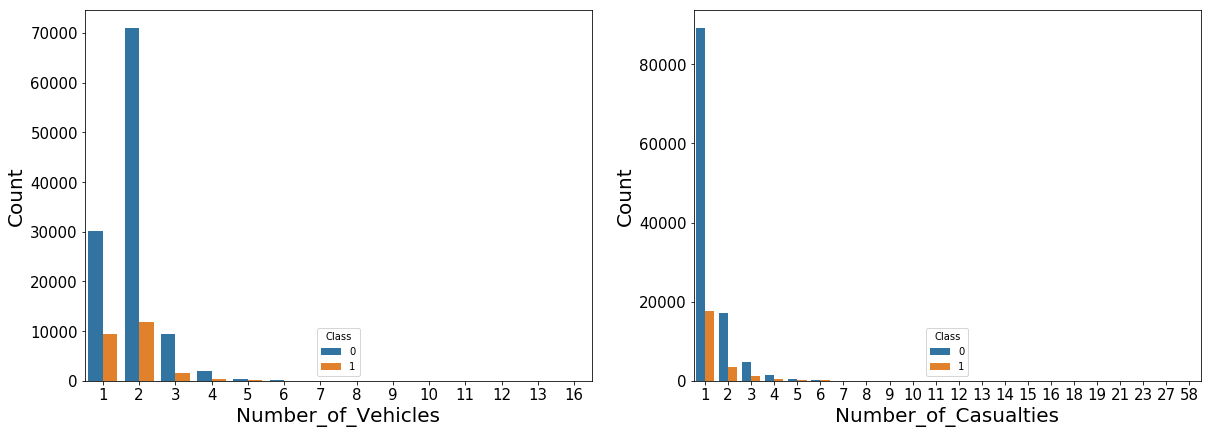

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.countplot( acc_data.Number_of_Vehicles, hue = acc_data.Class)
plt.ylabel( 'Count', fontsize=20)
plt.xlabel( 'Number_of_Vehicles', fontsize=20)

plt.tick_params(labelsize=15)
plt.subplot(222)
sns.countplot(acc_data['Number_of_Casualties'], hue  = acc_data.Class)
plt.ylabel( 'Count', fontsize=20)
plt.xlabel( 'Number_of_Casualties', fontsize=20) 

plt.tick_params(labelsize=15)

plt.savefig('data_viz/simple_stats_01.png')

In [21]:
number = ((acc_data.Number_of_Vehicles == 1).sum() + (acc_data.Number_of_Vehicles == 2).sum())/acc_data.Number_of_Vehicles.count()
print('proportion of accidents with one or two cars involved is: %.3f' %number)

proportion of accidents with one or two cars involved is: 0.896


In [22]:
number = ((acc_data.Number_of_Casualties == 1).sum() + (acc_data.Number_of_Casualties == 2).sum() )/acc_data.Number_of_Casualties.count()
print('proportion of accidents with one or two casualties involved is: %.3f' %number)

proportion of accidents with one or two casualties involved is: 0.932


In [24]:
serious_road_3 = acc_data.Class[acc_data.Road_Type== 3].sum()/acc_data.Class.count()
serious_road_6 = acc_data.Class[acc_data.Road_Type== 6].sum()/acc_data.Class.count()

In [25]:
proportion = serious_road_6/serious_road_3
proportion
print('proportion of accidents between one-way and dual roads is: %.3f' %proportion)

proportion of accidents between one-way and dual roads is: 5.788


In [26]:
# format dates to retqin month only
def to_month(date):
    month = datetime.strptime(date, '%d/%m/%Y')
    return int(datetime.strftime(month, '%m'))

acc_data['Date_month'] = acc_data['Date'].apply(to_month)

# format time to hours only
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

acc_data['Time_hour'] = acc_data['Time'].apply(to_hour)

In [27]:
#weekdays and weekends
weekday = [2,3,4,5,6]
weekend = [1,7]
acc_data['weekdays'] = acc_data['Day_of_Week'].map(lambda x: 'weekday' if x in weekday else 'weekend')


# what about time?

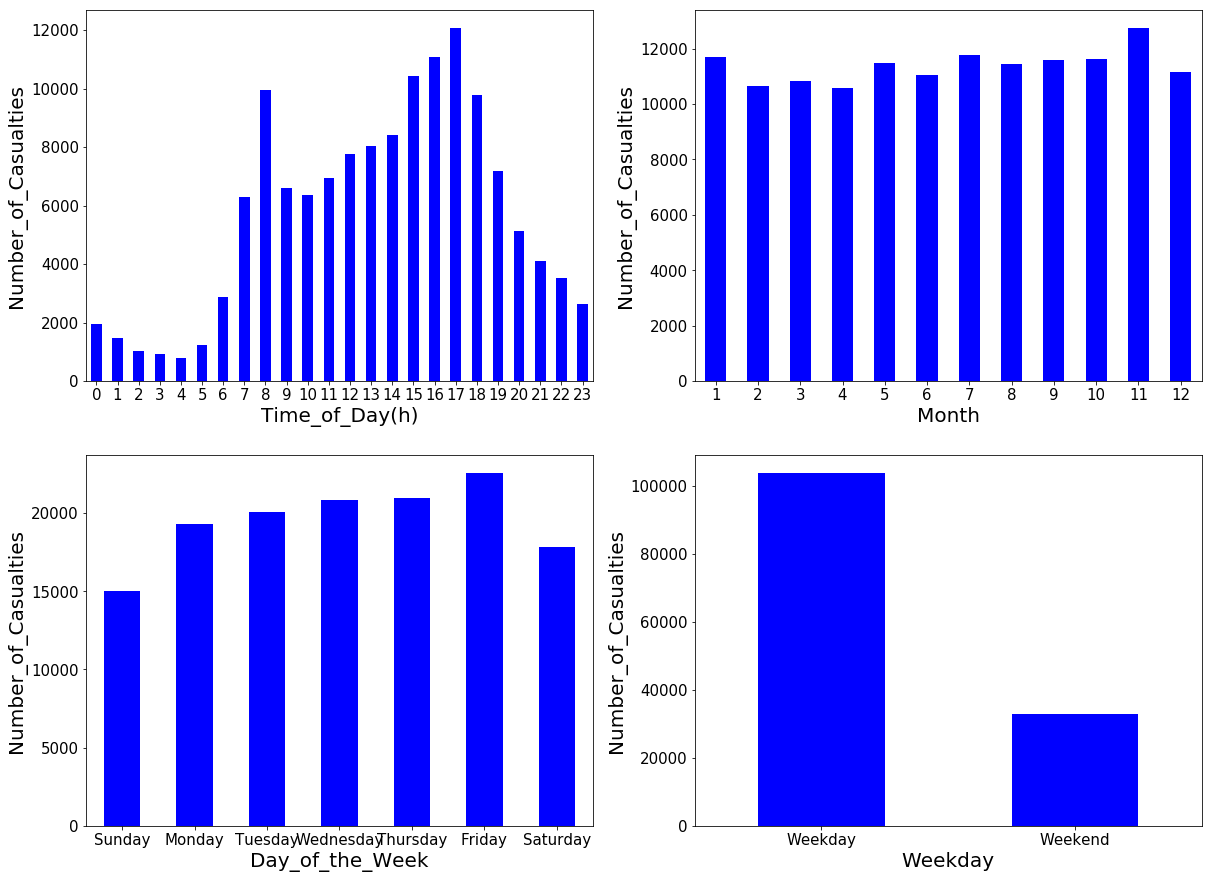

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(221)
acc_data.groupby('Time_hour').Number_of_Casualties.count().plot(kind = 'bar', color = 'blue')
plt.ylabel( 'Number_of_Casualties', fontsize=20)
plt.xlabel( 'Time_of_Day(h)', fontsize=20)
plt.tick_params(labelsize=15, rotation = 0)
plt.subplot(222)
acc_data.groupby('Date_month').Number_of_Casualties.count().plot(kind = 'bar', color = 'blue')
plt.ylabel( 'Number_of_Casualties', fontsize=20)
plt.xlabel( 'Month', fontsize=20)
plt.tick_params(labelsize=15, rotation = 0)
#some graph explanation from this,Date needs to be reagrouped
#acc_data['Accident_Severity'].groupby(acc_data['Date'])
plt.subplot(223)
acc_count = acc_data.groupby(acc_data.Day_of_Week).Accident_Severity.count().plot(kind = 'bar', color = 'blue')
plt.xticks(np.arange(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), rotation = 0)
plt.ylabel( 'Number_of_Casualties', fontsize=20)
plt.xlabel( 'Day_of_the_Week', fontsize=20)
plt.tick_params(labelsize=15)
plt.subplot(224)
acc_data.groupby('weekdays').Number_of_Casualties.count().plot(kind = 'bar', color = 'blue')
plt.ylabel( 'Number_of_Casualties', fontsize=20)
plt.xlabel( 'Weekday', fontsize=20)
plt.xticks(np.arange(2), ('Weekday', 'Weekend'), rotation = 0)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_02.png')


# what about roads?

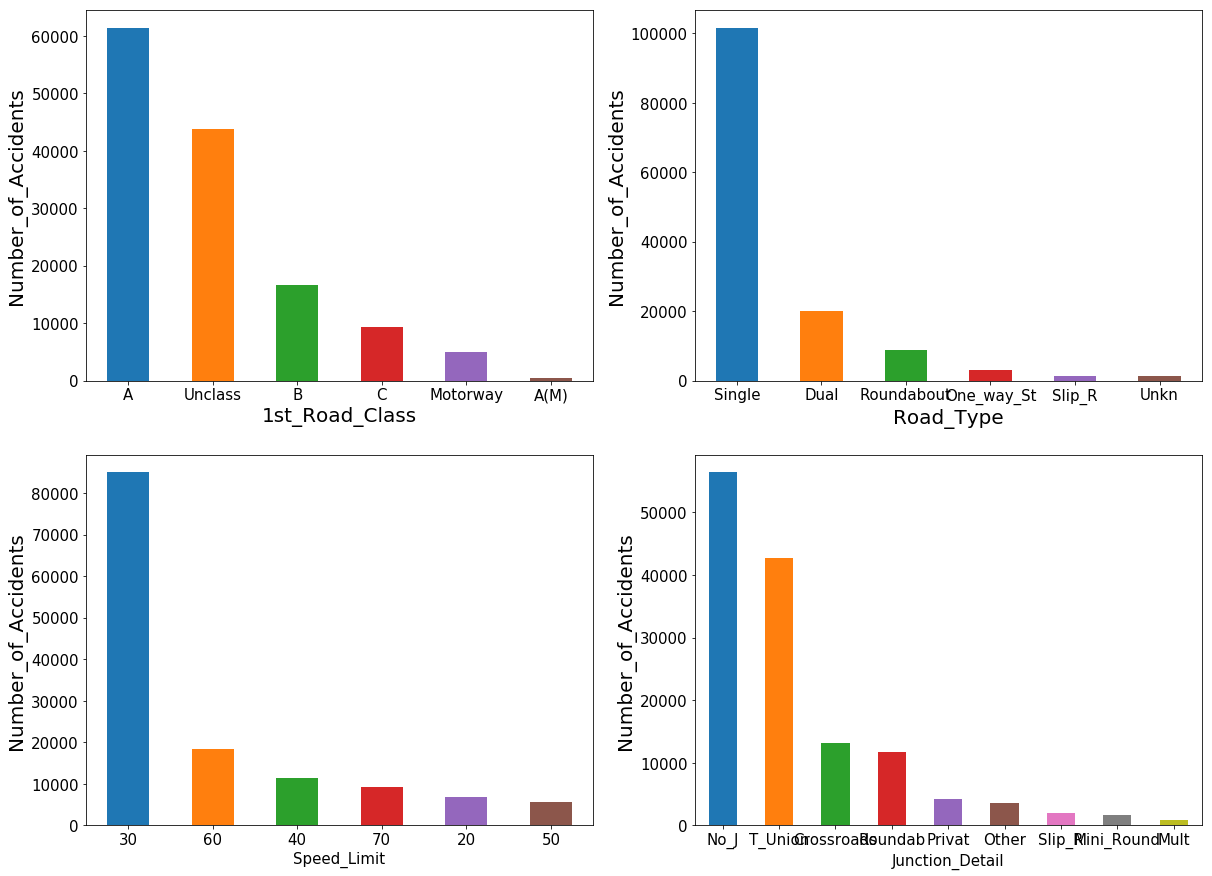

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(221)
acc_data['1st_Road_Class'].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(6), ('A', 'Unclass', 'B', 'C', 'Motorway', 'A(M)'), rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( '1st_Road_Class', fontsize=20)
plt.tick_params(labelsize=15)
plt.subplot(222)
acc_data.Road_Type.value_counts().plot(kind = 'bar')
plt.xticks(np.arange(6), ('Single', 'Dual', 'Roundabout', 'One_way_St', 'Slip_R', 'Unkn'), rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Road_Type', fontsize=20)
plt.tick_params(labelsize=15)
plt.subplot(223)
acc_data.Speed_limit.value_counts().plot(kind = 'bar')
plt.xticks(np.arange(6), ('30', '60', '40', '70', '20', '50'), rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Speed_Limit', fontsize=15)
plt.tick_params(labelsize=15)
plt.subplot(224)
acc_data.Junction_Detail.value_counts().plot(kind = 'bar')
plt.xticks(np.arange(9), ('No_J', 'T_Union','Crossroads', 'Roundab', 'Privat','Other','Slip_R','Mini_Round',
                          'Mult'), rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Junction_Detail', fontsize=15)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_03.png')

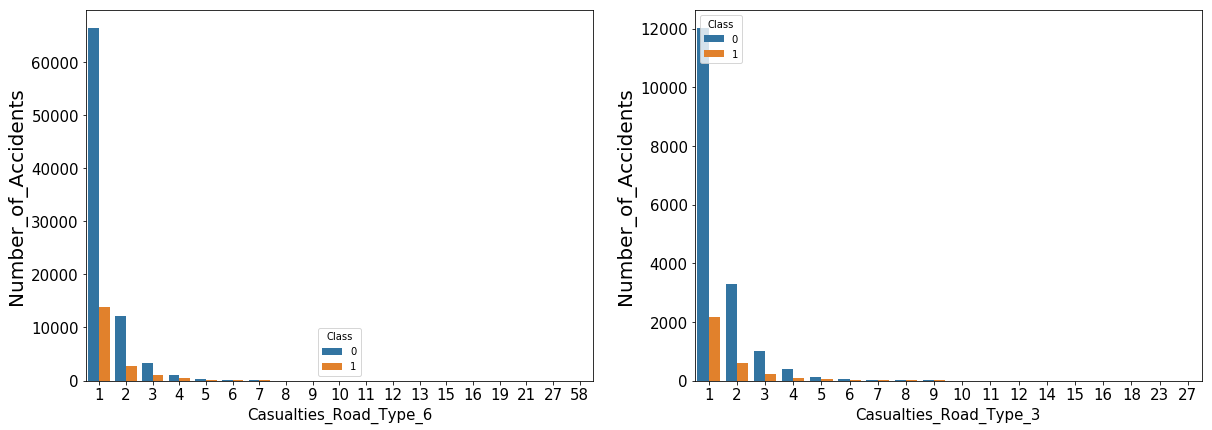

In [30]:


plt.figure(figsize=(20,15))
plt.subplot(221)
plt.legend(['Road_Type_6'])
sns.countplot( acc_data[acc_data['Road_Type'] == 6].Number_of_Casualties, hue = acc_data.Class)
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualties_Road_Type_6', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(222)
plt.legend('Road_Type_3')
sns.countplot( acc_data[acc_data['Road_Type'] == 3].Number_of_Casualties, hue = acc_data.Class)
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualties_Road_Type_3', fontsize=15)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_04.png')

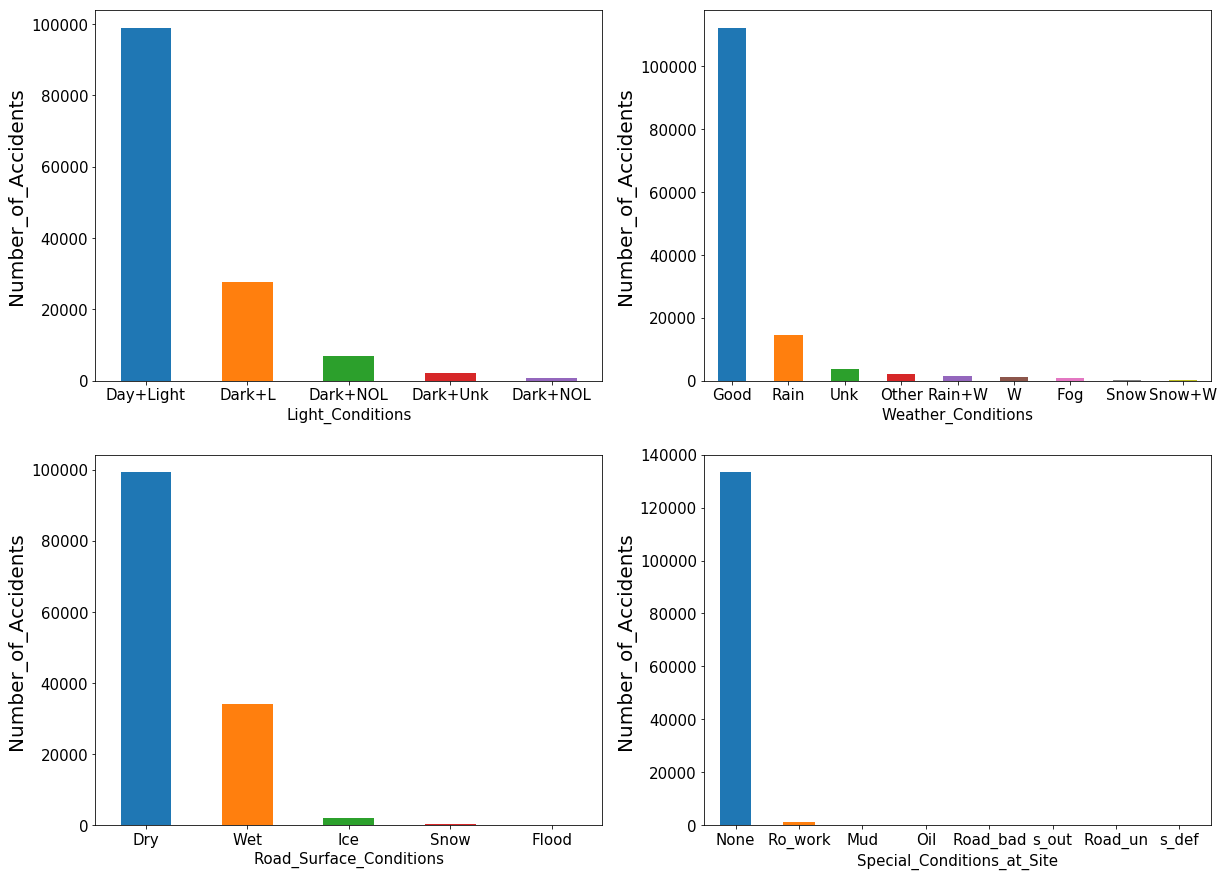

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(221)
acc_data.Light_Conditions.value_counts().plot(kind = 'bar')
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Light_Conditions', fontsize=15)
plt.xticks(np.arange(5), ('Day+Light', 'Dark+L', 'Dark+NOL', 'Dark+Unk', 'Dark+NOL'), rotation = 0)
plt.tick_params(labelsize=15)
plt.subplot(222)
acc_data.Weather_Conditions.value_counts().plot(kind = 'bar')
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Weather_Conditions', fontsize=15)
plt.xticks(np.arange(9), ('Good', 'Rain', 'Unk', 'Other', 'Rain+W', 'W', 'Fog', 'Snow', 'Snow+W'), rotation = 0)
plt.tick_params(labelsize=15)
plt.subplot(223)
acc_data.Road_Surface_Conditions.value_counts().plot(kind = 'bar')
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Road_Surface_Conditions', fontsize=15)
plt.xticks(np.arange(5), ('Dry', 'Wet', 'Ice', 'Snow','Flood'), rotation = 0)
plt.tick_params(labelsize=15)
plt.subplot(224)
acc_data.Special_Conditions_at_Site.value_counts().plot(kind = 'bar')
plt.xticks( rotation = 0)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Special_Conditions_at_Site', fontsize=15)
plt.xticks(np.arange(8), ('None', 'Ro_work', 'Mud', 'Oil', 'Road_bad', 's_out', 'Road_un', 's_def'), rotation = 0)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_05.png')             






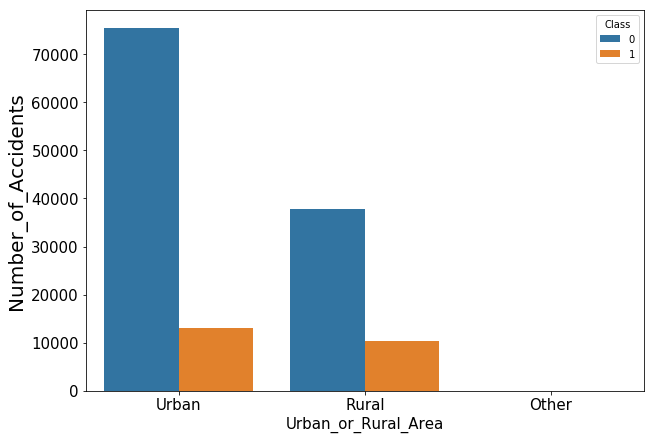

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(acc_data['Urban_or_Rural_Area'], hue = acc_data.Class)

plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Urban_or_Rural_Area', fontsize=15)
plt.xticks(np.arange(3), ('Urban', 'Rural', 'Other'), rotation = 0)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_06.png')

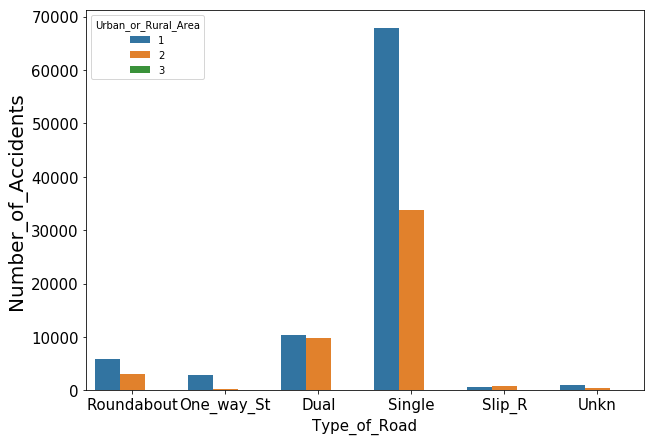

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(acc_data['Road_Type'], hue = acc_data.Urban_or_Rural_Area)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Type_of_Road', fontsize=15)
plt.xticks(np.arange(6), ('Roundabout', 'One_way_St','Dual', 'Single',  'Slip_R', 'Unkn'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_07.png')
#single means that there´s no separation betwwen carriageways(6), dual (3), roundabout(1)


In [34]:
#some numbers to reagrupate in levels afterwards

In [35]:
acc_data['1st_Road_Class'].value_counts()

3    61455
6    43762
4    16627
5     9372
1     5007
2      398
Name: 1st_Road_Class, dtype: int64

In [36]:
#only in junction cases
acc_data['2nd_Road_Class'].value_counts()

6.000    55315
3.000    12986
5.000     5256
4.000     5141
1.000      838
2.000       96
Name: 2nd_Road_Class, dtype: int64

In [37]:
#about junctions, divide in 00 and the rest
acc_data['Junction_Detail'].value_counts()

0.000    56401
3.000    42755
6.000    13193
1.000    11740
8.000     4268
9.000     3584
5.000     1950
2.000     1700
7.000      924
Name: Junction_Detail, dtype: int64

In [38]:
#no controls near the pedestrian
#this is not 
acc_data['Pedestrian_Crossing-Human_Control'].value_counts()

0.000    135415
2.000       693
1.000       328
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [39]:
acc_data['Pedestrian_Crossing-Physical_Facilities'].value_counts()

0.000    110456
5.000     10166
4.000      7632
1.000      4244
8.000      3212
7.000       280
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [40]:
acc_data['Pedestrian_Crossing-Physical_Facilities'].count()

135990

In [41]:
#seems to be useless
acc_data['Local_Authority_(Highway)'].count()

136621

In [42]:
acc_data['Local_Authority_(District)'].count()

136621

In [43]:
#not useful for the analysis but hot-spots (places with more accidents) can be extracted from here
acc_data.LSOA_of_Accident_Location.nunique()

28645

In [44]:
accidents = acc_data.drop(['Police_Force',
                           'Did_Police_Officer_Attend_Scene_of_Accident'], axis = 1)
accidents.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'LSOA_of_Accident_Location', 'Class',
       'Date_month', 'Time_hour', 'weekdays'],
      dtype='object')

# casualties data

In [459]:
# casualties data

In [45]:
cas_data = pd.read_csv('data/Casualties2016.csv', index_col=0)
cas_data.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
Accident_Index,,,,,,,,,,,,,,,
2016010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
2016010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2016010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
2016010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


In [46]:
print('casualties data shape is: ', cas_data.shape)

casualties data shape is:  (181384, 15)


In [47]:
cas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181384 entries, 2016010000005 to 2016984133416
Data columns (total 15 columns):
Vehicle_Reference                     181384 non-null int64
Casualty_Reference                    181384 non-null int64
Casualty_Class                        181384 non-null int64
Sex_of_Casualty                       181384 non-null int64
Age_of_Casualty                       181384 non-null int64
Age_Band_of_Casualty                  181384 non-null int64
Casualty_Severity                     181384 non-null int64
Pedestrian_Location                   181384 non-null int64
Pedestrian_Movement                   181384 non-null int64
Car_Passenger                         181384 non-null int64
Bus_or_Coach_Passenger                181384 non-null int64
Pedestrian_Road_Maintenance_Worker    181384 non-null int64
Casualty_Type                         181384 non-null int64
Casualty_Home_Area_Type               181384 non-null int64
Casualty_IMD_Decile                

In [48]:
#replace -1 with nans
cas_data = cas_data.replace(-1, np.nan)
cas_data['Sex_of_Casualty'].min()

1.0

In [49]:
cas_data.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,181384.000,181384.000,181384.000,181332.000,178538.000,178538.000,181384.000,181379.000,181370.000,180909.000,181346.000,181228.000,181384.000,159787.000,143926.000
mean,1.491,1.414,1.483,1.407,36.928,6.389,2.847,0.681,0.501,0.258,0.075,0.071,7.318,1.308,5.060
std,0.615,1.109,0.714,0.491,18.822,2.228,0.386,1.981,1.716,0.575,0.521,0.369,7.822,0.658,2.809
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,1.000,1.000,1.000,1.000,22.000,5.000,3.000,0.000,0.000,0.000,0.000,0.000,3.000,1.000,3.000
50%,1.000,1.000,1.000,1.000,33.000,6.000,3.000,0.000,0.000,0.000,0.000,0.000,9.000,1.000,5.000
75%,2.000,2.000,2.000,2.000,50.000,8.000,3.000,0.000,0.000,0.000,0.000,0.000,9.000,1.000,7.000
max,21.000,58.000,3.000,2.000,101.000,11.000,3.000,10.000,9.000,2.000,4.000,2.000,98.000,3.000,10.000


In [50]:
#proportion of drivers, passengers and pedestrian
total = cas_data.Casualty_Class.count()
drivers = (cas_data.Casualty_Class == 1).sum()
passengers = (cas_data.Casualty_Class == 2).sum()
driv_prop = drivers/total
pass_prop = passengers/total
pede_prop = 1 - driv_prop -pass_prop
print('proportion of accidents involve pedestrian is : %.3f' %pede_prop)

proportion of accidents involve pedestrian is : 0.130


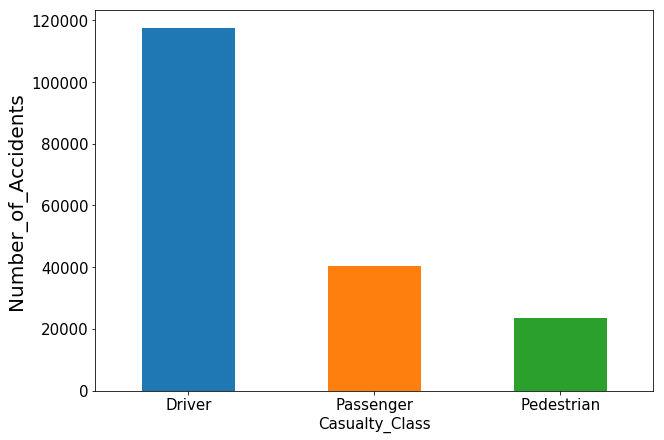

In [51]:
#driver passenger pedestrian 1,2,3
plt.figure(figsize=(10,7))
cas_data['Casualty_Class'].value_counts().plot(kind = 'bar')
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualty_Class', fontsize=15)
plt.xticks(np.arange(3), ('Driver', 'Passenger','Pedestrian'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_08.png')

In [52]:
#I will consider two levels in the analysis, same as before
cas_data['Class_Cas'] = cas_data['Casualty_Severity'].map(lambda x: 0 if x==3 else 1)

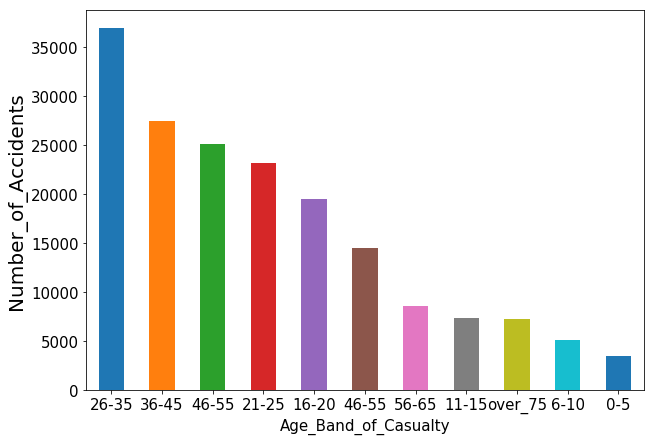

In [54]:
plt.figure(figsize=(10,7))
cas_data['Age_Band_of_Casualty'].value_counts().plot(kind= 'bar')
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Age_Band_of_Casualty', fontsize=15)
plt.xticks(np.arange(11), ('26-35','36-45','46-55','21-25','16-20','46-55','56-65','11-15',
                                              'over_75', '6-10', '0-5'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_09.png')

plt.show()

In [55]:
cas_data['Age_Band_of_Casualty'].value_counts()

6.000     36947
7.000     27490
8.000     25081
5.000     23183
4.000     19525
9.000     14519
10.000     8555
3.000      7401
11.000     7262
2.000      5102
1.000      3473
Name: Age_Band_of_Casualty, dtype: int64

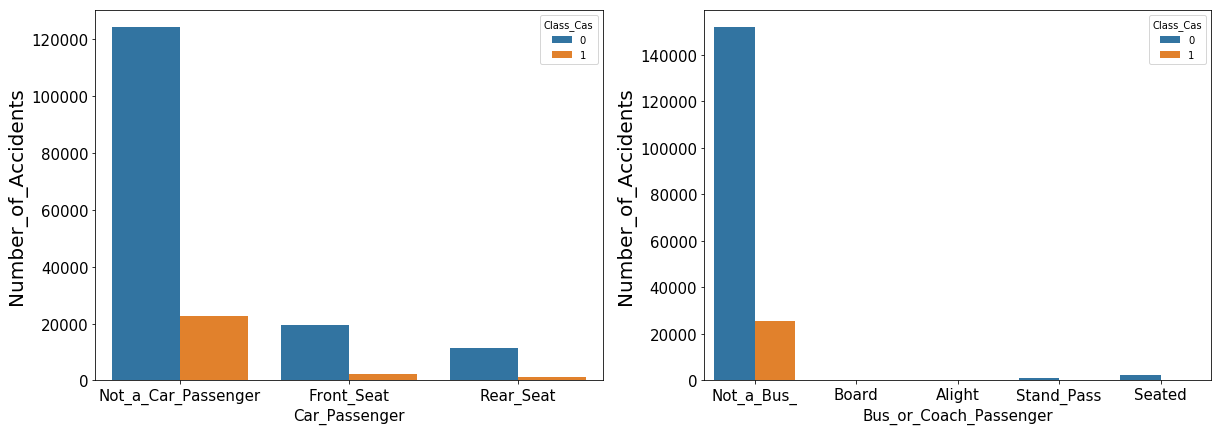

In [56]:
plt.figure(figsize=(20,15))


plt.tick_params(labelsize=15)
plt.subplot(221)
sns.countplot(cas_data.Car_Passenger,hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Car_Passenger', fontsize=15)
plt.xticks(np.arange(3), ('Not_a_Car_Passenger','Front_Seat','Rear_Seat'), rotation = 0)

plt.tick_params(labelsize=15)
plt.subplot(222)
sns.countplot(cas_data.Bus_or_Coach_Passenger,hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Bus_or_Coach_Passenger', fontsize=15)
plt.xticks(np.arange(5), ('Not_a_Bus_','Board','Alight','Stand_Pass','Seated'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_10.png')

In [57]:
cas_data['Casualty_Type'] == 1
cas_data['Casualty_Type'].value_counts()/cas_data['Casualty_Type'].count()

9    0.584
0    0.130
1    0.102
3    0.047
5    0.036
19   0.025
11   0.023
8    0.015
4    0.012
2    0.010
21   0.004
90   0.003
20   0.002
10   0.002
97   0.001
22   0.001
98   0.001
17   0.001
16   0.001
23   0.000
18   0.000
Name: Casualty_Type, dtype: float64

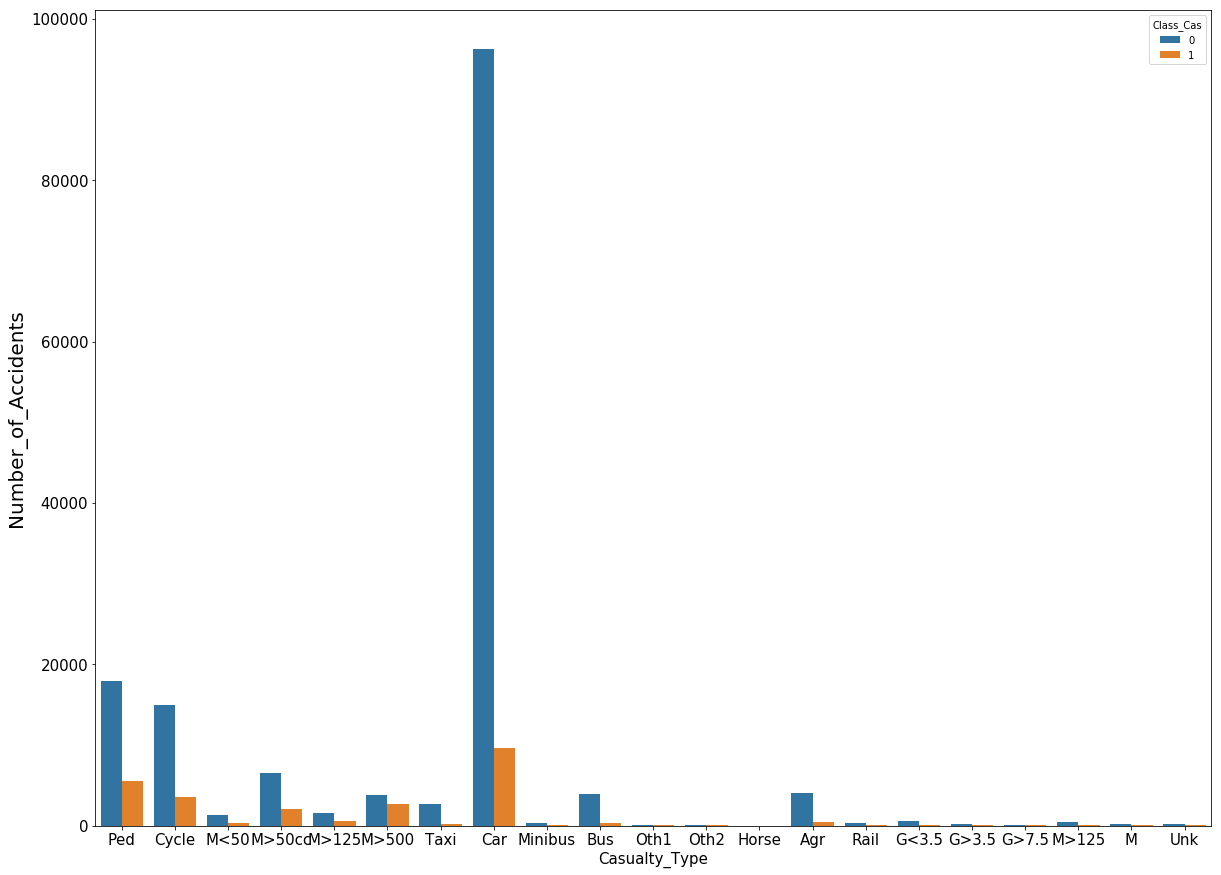

In [58]:
plt.figure(figsize=(20,15))
sns.countplot(cas_data.Casualty_Type,hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualty_Type', fontsize=15)
plt.xticks(np.arange(21), ('Ped', 'Cycle', 'M<50','M>50cc', 'M>125' , 'M>500', 'Taxi' ,'Car', 'Minibus', 'Bus', 'Oth1',
'Oth2', 'Horse', 'Agr', 'Rail','G<3.5', 'G>3.5','G>7.5', 'M>125','M', 'Unk','Oor'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_11.png')

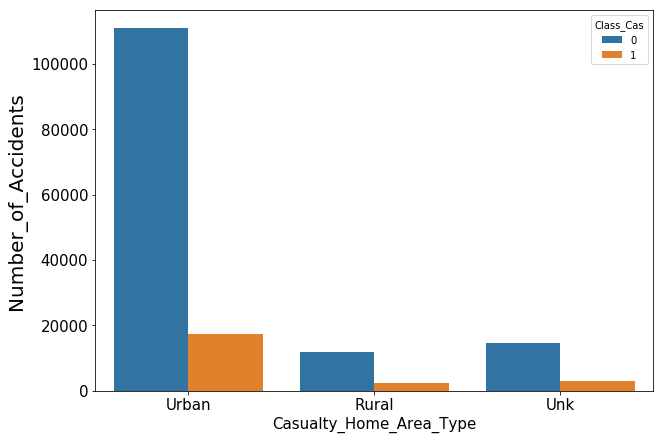

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(cas_data['Casualty_Home_Area_Type'], hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualty_Home_Area_Type', fontsize=15)
plt.xticks(np.arange(3), ('Urban', 'Rural', 'Unk'), rotation = 0)

plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_12.png')

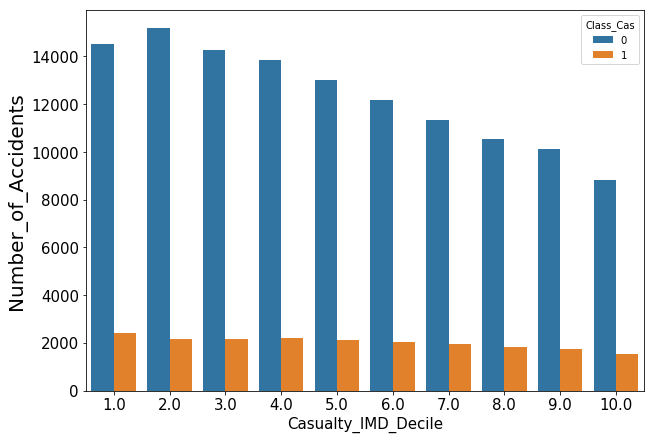

In [60]:
#Index of Multiple Deprivation
plt.figure(figsize=(10,7))
sns.countplot(cas_data['Casualty_IMD_Decile'], hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualty_IMD_Decile', fontsize=15)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_13.png')


#something interesting is happening here (from a social point of view)

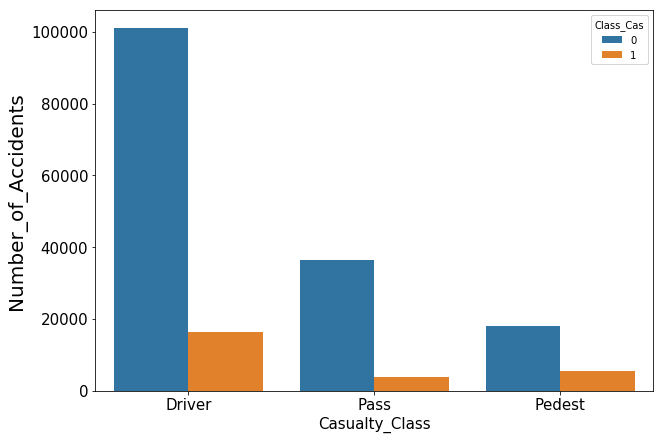

In [61]:

plt.figure(figsize=(10,7))
sns.countplot(cas_data.Casualty_Class, hue = cas_data.Class_Cas)
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Casualty_Class', fontsize=15)
plt.xticks(np.arange(3), ('Driver', 'Pass', 'Pedest'), rotation = 0)



plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_14.png')


In [62]:
#pedestrian conditions (0.23 vs 0.09 or 0.13)
prop_dr = cas_data[cas_data.Casualty_Class == 1]['Class_Cas'].value_counts()/cas_data[cas_data.Casualty_Class == 1]['Class_Cas'].count()
prop_pa = cas_data[cas_data.Casualty_Class == 2]['Class_Cas'].value_counts()/cas_data[cas_data.Casualty_Class == 2]['Class_Cas'].count()
prop_pe = cas_data[cas_data.Casualty_Class == 3]['Class_Cas'].value_counts()/cas_data[cas_data.Casualty_Class == 3]['Class_Cas'].count()
prop_pe

0   0.763
1   0.237
Name: Class_Cas, dtype: float64

# makemodel data

In [63]:
mak_data = pd.read_csv('data/MakeModel2016.csv', index_col=0)
mak_data.head()

,accyr,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2016010000005,2016,1,8,0,6,0,0,0,0,0,...,1,1,8,-1,-1,-1,3,1,NaN,NaN
2016010000005,2016,2,2,0,18,0,0,0,0,0,...,6,1,5,124,1,4,4,1,YAMAHA,HW 125 XENTER
2016010000006,2016,1,9,0,18,0,2,2,10,1,...,6,2,7,1461,2,1,10,1,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
2016010000008,2016,1,9,0,18,0,4,5,0,0,...,6,1,5,1390,1,5,8,1,VOLKSWAGEN,SCIROCCO TSI
2016010000016,2016,1,11,0,18,0,1,0,0,0,...,1,1,8,6692,2,7,9,1,OTHER BRITISH,Missing


In [64]:
mak_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252500 entries, 2016010000005 to 2016984133416
Data columns (total 23 columns):
accyr                               252500 non-null int64
Vehicle_Reference                   252500 non-null int64
Vehicle_Type                        252500 non-null int64
Towing_and_Articulation             252500 non-null int64
Vehicle_Manoeuvre                   252500 non-null int64
Vehicle_Location-Restricted_Lane    252500 non-null int64
Junction_Location                   252500 non-null int64
Skidding_and_Overturning            252500 non-null int64
Hit_Object_in_Carriageway           252500 non-null int64
Vehicle_Leaving_Carriageway         252500 non-null int64
Hit_Object_off_Carriageway          252500 non-null int64
1st_Point_of_Impact                 252500 non-null int64
Was_Vehicle_Left_Hand_Drive         252500 non-null int64
Journey_Purpose_of_Driver           252500 non-null int64
Sex_of_Driver                       252500 non-null int64
Age_B

In [66]:
print('make model shape is : ' ,mak_data.shape)

make model shape is :  (252500, 23)


In [67]:
#replace -1 with nans
mak_data = mak_data.replace(-1, np.nan)

In [68]:
#let us see vars
mak_data.accyr.std()

0.0

In [69]:
mak_data = mak_data.drop(['accyr'], axis = 1)
mak_data.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2016010000005,1,8.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,8.000,nan,nan,nan,3.000,1.000,NaN,NaN
2016010000005,2,2.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.000,1.000,5.000,124.000,1.000,4.000,4.000,1.000,YAMAHA,HW 125 XENTER
2016010000006,1,9.000,0.000,18.000,0.000,2.000,2.000,10.000,1.000,0.000,...,6.000,2.000,7.000,1461.000,2.000,1.000,10.000,1.000,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
2016010000008,1,9.000,0.000,18.000,0.000,4.000,5.000,0.000,0.000,0.000,...,6.000,1.000,5.000,1390.000,1.000,5.000,8.000,1.000,VOLKSWAGEN,SCIROCCO TSI
2016010000016,1,11.000,0.000,18.000,0.000,1.000,0.000,0.000,0.000,0.000,...,1.000,1.000,8.000,6692.000,2.000,7.000,9.000,1.000,OTHER BRITISH,Missing


In [70]:
 mak_data['Towing_and_Articulation'].value_counts()

0.000    247665
1.000      2607
4.000       815
5.000       327
3.000       147
2.000        53
Name: Towing_and_Articulation, dtype: int64

In [71]:
mak_data['Vehicle_Manoeuvre'].value_counts()

18.000    120830
9.000      24700
4.000      19387
3.000      15477
5.000      11502
2.000      10056
17.000      8711
7.000       8592
16.000      7481
13.000      4978
10.000      3812
1.000       3547
14.000      2957
12.000      2421
11.000      2241
6.000       2022
15.000      1659
8.000       1185
Name: Vehicle_Manoeuvre, dtype: int64

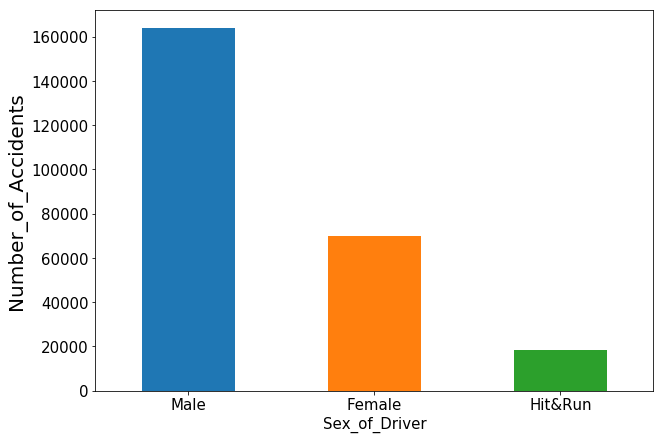

In [72]:
#male female hit&run

plt.figure(figsize=(10,7))
mak_data['Sex_of_Driver'].value_counts().plot(kind = 'bar')
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Sex_of_Driver', fontsize=15)
plt.xticks(np.arange(3), ('Male', 'Female', 'Hit&Run'), rotation = 0)



plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_15.png')


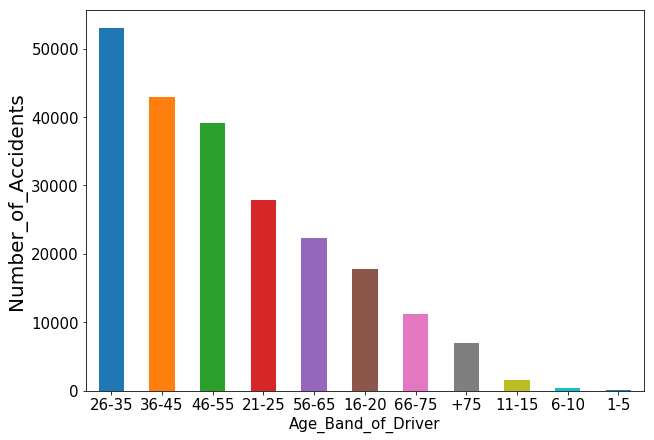

In [73]:
#mak_data['Age_Band_of_Driver'].value_counts().plot(kind = 'barh')
plt.figure(figsize=(10,7))
mak_data['Age_Band_of_Driver'].value_counts().plot(kind = 'bar')
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Age_Band_of_Driver', fontsize=15)
plt.xticks(np.arange(11), ('26-35', '36-45', '46-55','21-25', '56-65' , '16-20', '66-75' ,'+75', '11-15', '6-10', 
                           '1-5'), rotation = 0)




plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_16.png')

In [74]:
#not interesting for our purposes
mak_data.Journey_Purpose_of_Driver.value_counts()

6.000    167606
1.000     38028
2.000     25886
5.000     17577
3.000      2545
4.000       844
Name: Journey_Purpose_of_Driver, dtype: int64

In [75]:
#group here
bins = [0,5,10,15,20,99]
groups = ['0-5','5-10','10-15','15-20', '+20']
mak_data['Vehicle_age_group'] = pd.cut(mak_data['Age_of_Vehicle'],bins,labels = groups)
#mak_data['Vehicle_age_group'].value_counts().plot(kind = 'bar')

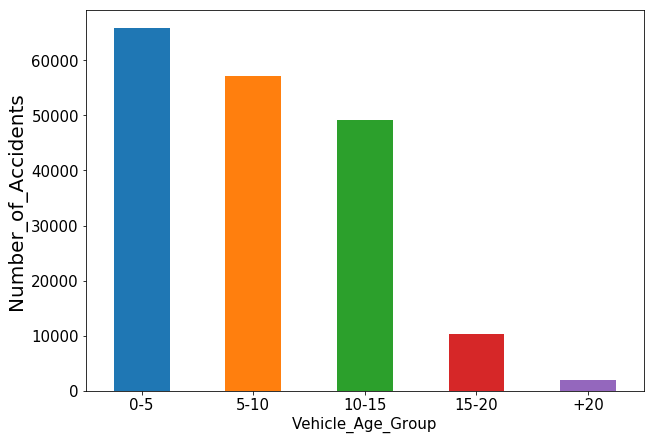

In [76]:
plt.figure(figsize=(10,7))
mak_data['Vehicle_age_group'].value_counts().plot(kind = 'bar')
plt.ylabel( 'Number_of_Accidents', fontsize=20)
plt.xlabel( 'Vehicle_Age_Group', fontsize=15)
plt.xticks(np.arange(5), ('0-5', '5-10', '10-15','15-20','+20'), rotation = 0)




plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_17.png')

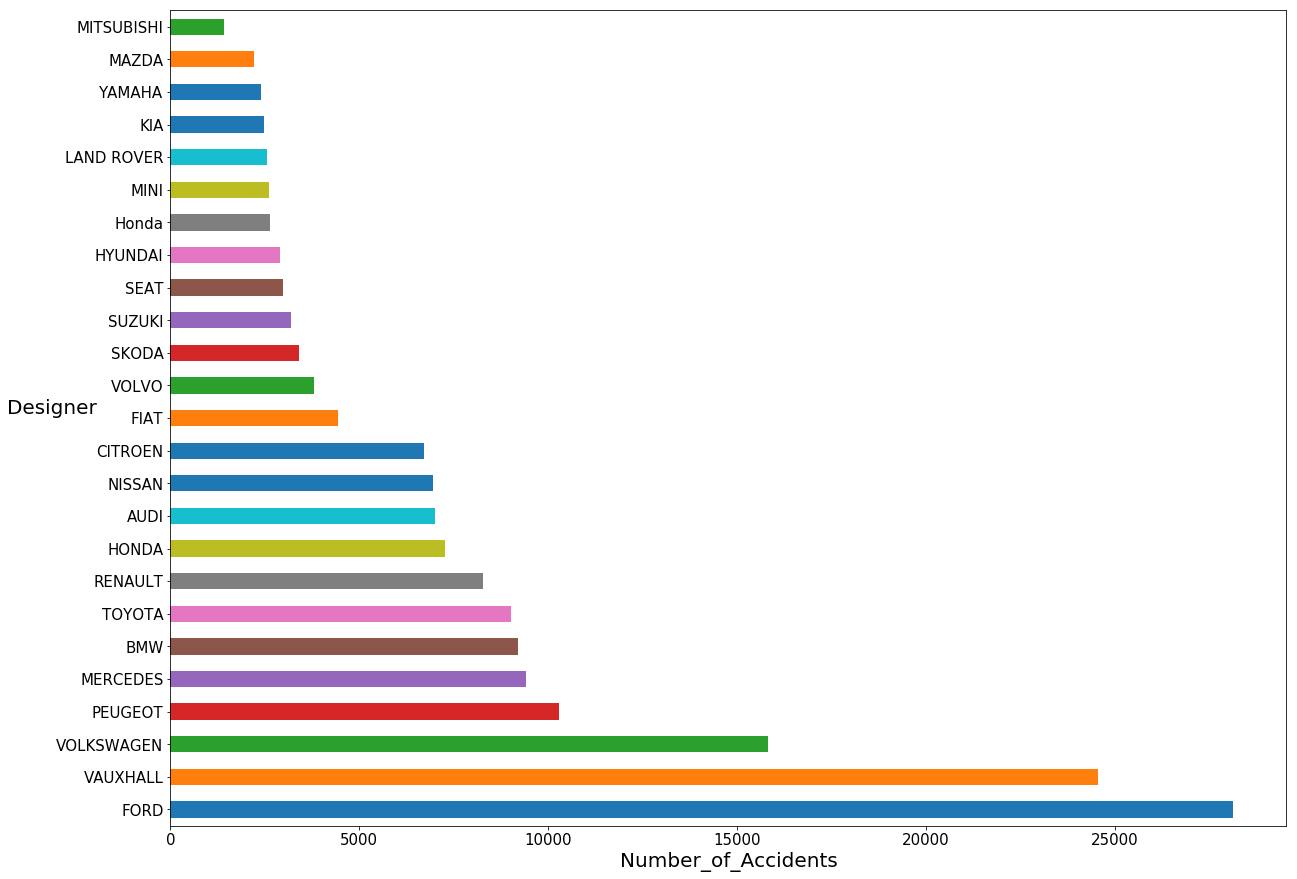

In [78]:
plt.figure(figsize = (20,15))
mak_data['make'].value_counts().head(25).plot(kind = 'barh')
plt.xlabel( 'Number_of_Accidents', fontsize=20)
plt.ylabel('Designer',fontsize=20, rotation = 0)
plt.tick_params(labelsize=15)
plt.savefig('data_viz/simple_stats_18.png')

In [79]:
#too much info for our purposes
mak_data = mak_data.drop(['model'], axis = 1)

In [80]:
#hypothesis: 
#1. there are more accidents and are more serious in one-way roads in rural areas more in  oneway,
#2. pedestrian are the most damaged casualties and it is related with lack of facilities , 
#3. old cars and old people are more involved in accidents,
#4.people with the smaller IMD decile are more involved in accidents

In [81]:
#

In [83]:
accidents.to_csv('data_acc.csv')
cas_data.to_csv('data_cas.csv')
mak_data.to_csv('data_mak.csv')